In [2]:
import os
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
def prepare_data(folder_path):
    X = [] # This will hold our images
    y = [] # This will hold our labels (0, 1, 2, 3)
    
    # Get the names of the folders (MildDemented, etc.)
    categories = os.listdir(folder_path)
    
    for label_index, category in enumerate(categories):
        category_path = os.path.join(folder_path, category)
        
        for img_name in os.listdir(category_path):
            # Load the image in Grayscale (Black & White) to keep it simple
            img_path = os.path.join(category_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            
            # Resize it and flatten it (turn 2D grid into 1D line)
            img = cv2.resize(img, (64, 64))
            X.append(img.flatten()) 
            y.append(label_index)
            
    return np.array(X), np.array(y)

In [4]:
train_path = "../Data/Alzheimerr/train_set/"
test_path = "../Data/Alzheimerr/test_set/"

print("Loading training data... please wait.")
X_train, y_train = prepare_data(train_path)

print("Loading testing data...")
X_test, y_test = prepare_data(test_path)

print(f"Loaded {len(X_train)} training images and {len(X_test)} testing images.")

Loading training data... please wait.
Loading testing data...
Loaded 7200 training images and 800 testing images.


In [5]:
# Create the model
ml_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model (this is where the learning happens)
print("Training the Random Forest... this might take a minute.")
ml_model.fit(X_train, y_train)
print("Training complete!")

Training the Random Forest... this might take a minute.
Training complete!


In [6]:
# Make predictions
predictions = ml_model.predict(X_test)

# Print the accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"The model's accuracy is: {accuracy * 100:.2f}%")

# Detailed report
print("\nClassification Report:")
print(classification_report(y_test, predictions))

The model's accuracy is: 63.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.60      0.60       200
           1       0.77      0.79      0.78       200
           2       0.62      0.64      0.63       200
           3       0.52      0.49      0.51       200

    accuracy                           0.63       800
   macro avg       0.63      0.63      0.63       800
weighted avg       0.63      0.63      0.63       800



In [7]:
import joblib
import pandas as pd

# Save the Random Forest model
joblib.dump(ml_model, '../Outputs/random_forest_model.pkl')

# Save the accuracy report as a CSV
report = classification_report(y_test, predictions, output_dict=True)
pd.DataFrame(report).transpose().to_csv('../Outputs/ml_report.csv')

print("ML Model and Report saved to Outputs folder!")

ML Model and Report saved to Outputs folder!


In [10]:
# Assuming you have already trained 'ml_model' and loaded 'X_test' and 'y_test'
# This creates the 'predictions' variable that the plot needs
predictions = ml_model.predict(X_test)

# If your categories are not defined, define them here:
categories = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

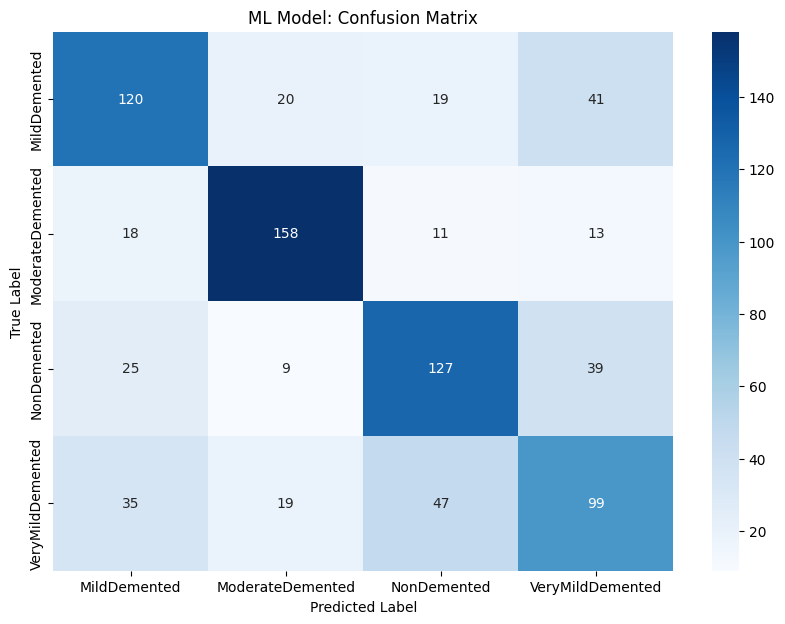

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Create the Confusion Matrix
cm = confusion_matrix(y_test, predictions)

# 2. Plot using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=categories, 
            yticklabels=categories)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('ML Model: Confusion Matrix')

# 3. Save it to your folder
plt.savefig('../Outputs/ml_confusion_matrix.png')
plt.show()

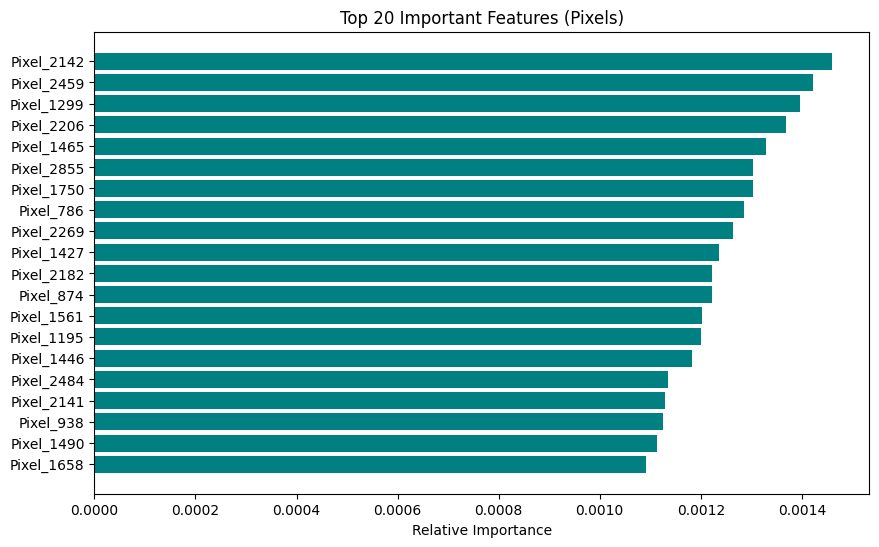

In [12]:
# Get the importance of each "pixel" feature
importances = ml_model.feature_importances_

# We will look at the top 20 most important features
indices = np.argsort(importances)[-20:]

plt.figure(figsize=(10, 6))
plt.title('Top 20 Important Features (Pixels)')
plt.barh(range(len(indices)), importances[indices], align='center', color='teal')
plt.yticks(range(len(indices)), [f'Pixel_{i}' for i in indices])
plt.xlabel('Relative Importance')

plt.savefig('../Outputs/ml_feature_importance.png')
plt.show()

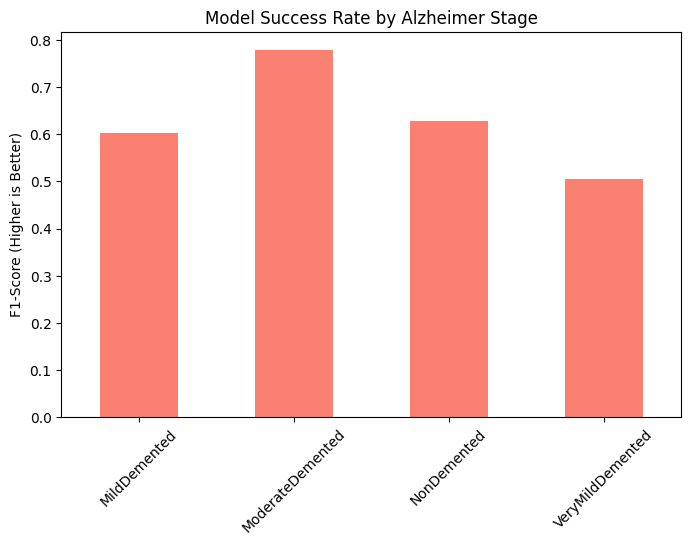

In [13]:
from sklearn.metrics import classification_report
import pandas as pd

# Convert the report to a dataframe
report = classification_report(y_test, predictions, target_names=categories, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot the F1-Score for each category
report_df[:-3]['f1-score'].plot(kind='bar', color='salmon', figsize=(8, 5))
plt.title('Model Success Rate by Alzheimer Stage')
plt.ylabel('F1-Score (Higher is Better)')
plt.xticks(rotation=45)

plt.savefig('../Outputs/ml_class_performance.png')
plt.show()